<a href="https://colab.research.google.com/github/Muskan-Y/Fraudulent_Transactions_Detection/blob/main/Fraudulent_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, auc, precision_recall_curve, roc_curve

# **TABLE OF CONTENTS**

---
1.LOAD DATA

2.PRE-PROCESSING

3.ANALYSIS

4.FRAUD AND FLAGGED FRAUD

5.MERCHANT TRANSACTIONS

6.REMOVE UNWANTED

7.VISUALIZATION

8.SMOTE OVERSAMPLING

9.FEATURE ENGINEERING

10.TRAINING

11.TESTING

12.MODEL EVALUATION

13.CANDIDATE EXPECTATION QUESTIONS

**PRE-PROCESSING**

In [ ]:
# Read the data
df=pd.read_csv('Fraud.csv')
# Shape the data
df.shape

(14247, 11)

1. **VISUALIZE THE DATA**

In [ ]:
# Get head of the data
df.head(200)

step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0       1   PAYMENT    9839.64  C1231006815       170136.0       160296.36   
1       1   PAYMENT    1864.28  C1666544295        21249.0        19384.72   
2       1  TRANSFER     181.00  C1305486145          181.0            0.00   
3       1  CASH_OUT     181.00   C840083671          181.0            0.00   
4       1   PAYMENT   11668.14  C2048537720        41554.0        29885.86   
..    ...       ...        ...          ...            ...             ...   
195     1  CASH_OUT  210370.09  C2121995675            0.0            0.00   
196     1  CASH_OUT   36437.06  C2120063568            0.0            0.00   
197     1  CASH_OUT   82691.56  C1620409359            0.0            0.00   
198     1  CASH_OUT  338767.10   C691691381            0.0            0.00   
199     1  CASH_OUT  187728.59   C264978436            0.0            0.00   

        nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0    M1979787155            0.00            0.00      0.0             0.0  
1    M2044282225            0.00            0.00      0.0             0.0  
2     C553264065            0.00            0.00      1.0             0.0  
3      C38997010        21182.00            0.00      1.0             0.0  
4    M1230701703            0.00            0.00      0.0             0.0  
..           ...             ...             ...      ...             ...  
195  C1170794006      1442298.03        22190.99      0.0             0.0  
196  C1740000325       154606.00      1363368.51      0.0             0.0  
197   C248609774       657983.89      6453430.91      0.0             0.0  
198   C453211571       544481.28      3461666.05      0.0             0.0  
199  C1360767589       394124.51      2107965.39      0.0             0.0  

[200 rows x 11 columns]

import numpy as np
from google.colab import autoviz
df_6327791966475998392 = autoviz.get_df('df_6327791966475998392')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6327791966475998392, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8692971298166617796 = autoviz.get_df('df_8692971298166617796')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8692971298166617796, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5784304579229795037 = autoviz.get_df('df_5784304579229795037')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5784304579229795037, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6341752991307459855 = autoviz.get_df('df_6341752991307459855')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6341752991307459855, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1298400130538931253 = autoviz.get_df('df_1298400130538931253')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1298400130538931253, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2933437574189632215 = autoviz.get_df('df_2933437574189632215')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2933437574189632215, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5462292675453721559 = autoviz.get_df('df_5462292675453721559')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5462292675453721559, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2837784572986178167 = autoviz.get_df('df_2837784572986178167')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2837784572986178167, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2393923160081344232 = autoviz.get_df('df_2393923160081344232')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2393923160081344232, *['type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_82260310983096965 = autoviz.get_df('df_82260310983096965')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_82260310983096965, *[[['index', 'amount'], ['amount', 'oldbalanceOrg'], ['oldbalanceOrg', 'newbalanceOrig'], ['newbalanceOrig', 'oldbalanceDest']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_6589861938176141538 = autoviz.get_df('df_6589861938176141538')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6589861938176141538, *['index', 'type'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5645962035071009590 = autoviz.get_df('df_5645962035071009590')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5645962035071009590, *['amount', 'type'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_240403438610731062 = autoviz.get_df('df_240403438610731062')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_240403438610731062, *['oldbalanceOrg', 'type'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8013091039129775058 = autoviz.get_df('df_8013091039129775058')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8013091039129775058, *['newbalanceOrig', 'type'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_1958495116865958554 = autoviz.get_df('df_1958495116865958554')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1958495116865958554, *['index', 'amount', 'type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5069202287577664627 = autoviz.get_df('df_5069202287577664627')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5069202287577664627, *['index', 'oldbalanceOrg', 'type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3272925763996083934 = autoviz.get_df('df_3272925763996083934')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3272925763996083934, *['index', 'newbalanceOrig', 'type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2943829633559856316 = autoviz.get_df('df_2943829633559856316')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2943829633559856316, *['index', 'oldbalanceDest', 'type'], **{})
chart

In [ ]:
df.tail(200)

step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
14047     8   PAYMENT     3398.52   C736229777       30331.00        26932.48   
14048     8  TRANSFER   481707.23  C1828500527       26932.48            0.00   
14049     8  TRANSFER  2794982.53   C591190387           0.00            0.00   
14050     8  TRANSFER  3457807.35   C129339892           0.00            0.00   
14051     8  TRANSFER   516276.21  C1661816191           0.00            0.00   
...     ...       ...         ...          ...            ...             ...   
14242     8   PAYMENT    20924.47  C1540995845       18265.00            0.00   
14243     8  CASH_OUT    75244.54  C1827218030       38369.00            0.00   
14244     8   PAYMENT     3074.36  C1632817923       10242.00         7167.64   
14245     8   PAYMENT    11465.21  C1837637612          38.00            0.00   
14246     8  CASH_OUT    71154.12            C            NaN             NaN   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
14047  M1058760957            0.00            0.00      0.0             0.0  
14048    C30516998       582875.99            0.00      0.0             0.0  
14049  C1856036778      3804441.59     13688613.94      0.0             0.0  
14050   C991505714      9506473.57     13994753.40      0.0             0.0  
14051  C1327907419      1137614.99      1204577.24      0.0             0.0  
...            ...             ...             ...      ...             ...  
14242  M1309313968            0.00            0.00      0.0             0.0  
14243  C1292445663          167.00            0.00      0.0             0.0  
14244  M2001030591            0.00            0.00      0.0             0.0  
14245  M1222093409            0.00            0.00      0.0             0.0  
14246          NaN             NaN             NaN      NaN             NaN  

[200 rows x 11 columns]

import numpy as np
from google.colab import autoviz
df_5643264140140511611 = autoviz.get_df('df_5643264140140511611')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5643264140140511611, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8013028388349073481 = autoviz.get_df('df_8013028388349073481')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8013028388349073481, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4639077775315057779 = autoviz.get_df('df_4639077775315057779')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4639077775315057779, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2895360966877399539 = autoviz.get_df('df_2895360966877399539')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2895360966877399539, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_678906741563385991 = autoviz.get_df('df_678906741563385991')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_678906741563385991, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5992570401074846869 = autoviz.get_df('df_5992570401074846869')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5992570401074846869, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3560205756220515656 = autoviz.get_df('df_3560205756220515656')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3560205756220515656, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9213026477916704403 = autoviz.get_df('df_9213026477916704403')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_9213026477916704403, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3644113914763456562 = autoviz.get_df('df_3644113914763456562')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3644113914763456562, *['type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8754396695848134644 = autoviz.get_df('df_8754396695848134644')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_8754396695848134644, *[[['index', 'amount'], ['amount', 'oldbalanceOrg'], ['oldbalanceOrg', 'newbalanceOrig'], ['newbalanceOrig', 'oldbalanceDest']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_1655139686943132826 = autoviz.get_df('df_1655139686943132826')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_1655139686943132826, *['index', 'type'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2439598208020032889 = autoviz.get_df('df_2439598208020032889')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2439598208020032889, *['amount', 'type'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5820770686532306154 = autoviz.get_df('df_5820770686532306154')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5820770686532306154, *['oldbalanceOrg', 'type'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8270634958068200272 = autoviz.get_df('df_8270634958068200272')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8270634958068200272, *['newbalanceOrig', 'type'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_4974804586632114274 = autoviz.get_df('df_4974804586632114274')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4974804586632114274, *['index', 'amount', 'type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4848911402937129260 = autoviz.get_df('df_4848911402937129260')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4848911402937129260, *['index', 'oldbalanceOrg', 'type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2653552289054086773 = autoviz.get_df('df_2653552289054086773')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2653552289054086773, *['index', 'newbalanceOrig', 'type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4179525538905146936 = autoviz.get_df('df_4179525538905146936')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4179525538905146936, *['index', 'oldbalanceDest', 'type'], **{})
chart

**ANALYSIS**

**VISUALISATION**

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'
df.dropna(inplace=True)

# After running the above code, the null values will be removed from the dataset.

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  14246.000000  1.424600e+04   1.424600e+04    1.424600e+04   
mean       5.036923  1.118877e+05   7.937369e+05    8.107136e+05   
std        2.463073  2.805248e+05   2.016693e+06    2.059984e+06   
min        1.000000  2.390000e+00   0.000000e+00    0.000000e+00   
25%        2.000000  4.584905e+03   0.000000e+00    0.000000e+00   
50%        6.000000  1.286530e+04   2.041500e+04    8.216325e+03   
75%        7.000000  1.218946e+05   1.384956e+05    1.294173e+05   
max        8.000000  1.000000e+07   1.293042e+07    1.301050e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    1.424600e+04    1.424600e+04  14246.000000         14246.0  
mean     8.411336e+05    1.147629e+06      0.005475             0.0  
std      2.528174e+06    3.151706e+06      0.073794             0.0  
min      0.000000e+00    0.000000e+00      0.000000             0.0  
25%      0.000000e+00    0.000000e+00      0.000000             0.0  
50%      0.000000e+00    0.000000e+00      0.000000             0.0  
75%      2.641427e+05    2.775150e+05      0.000000             0.0  
max      2.093759e+07    2.533027e+07      1.000000             0.0

import numpy as np
from google.colab import autoviz
df_7303039368496689776 = autoviz.get_df('df_7303039368496689776')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7303039368496689776, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2987835989156490381 = autoviz.get_df('df_2987835989156490381')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2987835989156490381, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_622784392356269570 = autoviz.get_df('df_622784392356269570')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_622784392356269570, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6885845330611083130 = autoviz.get_df('df_6885845330611083130')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6885845330611083130, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6033572218331661363 = autoviz.get_df('df_6033572218331661363')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6033572218331661363, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3347855100192354113 = autoviz.get_df('df_3347855100192354113')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3347855100192354113, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7545599910209183285 = autoviz.get_df('df_7545599910209183285')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7545599910209183285, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8053019632234119200 = autoviz.get_df('df_8053019632234119200')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8053019632234119200, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8472961695375095297 = autoviz.get_df('df_8472961695375095297')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8472961695375095297, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2692635767679577655 = autoviz.get_df('df_2692635767679577655')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_2692635767679577655, *[[['step', 'amount'], ['amount', 'oldbalanceOrg'], ['oldbalanceOrg', 'newbalanceOrig'], ['newbalanceOrig', 'oldbalanceDest']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_3716916127157885869 = autoviz.get_df('df_3716916127157885869')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3716916127157885869, *['step', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2155802723816761991 = autoviz.get_df('df_2155802723816761991')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2155802723816761991, *['amount', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8290819714231174081 = autoviz.get_df('df_8290819714231174081')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8290819714231174081, *['oldbalanceOrg', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_857738200450724816 = autoviz.get_df('df_857738200450724816')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_857738200450724816, *['newbalanceOrig', 'index'], **{'inner': 'stick'})
chart

**Fraud and flagged fraud**

In [ ]:
print('Number of fraudulent transactions \t: {}'.format(len(df[df['isFraud']==1])))
print('Number of non-fraudulent transactions \t: {}'.format(len(df[df['isFraud']==0])))
print('\nNumber of transactions flagged fraud \t: {}'.format(len(df[df['isFlaggedFraud']==1])))
print('Number of transactions flagged non-fraud: {}'.format(len(df[df['isFlaggedFraud']==0])))

Number of fraudulent transactions 	: 78
Number of non-fraudulent transactions 	: 14168

Number of transactions flagged fraud 	: 0
Number of transactions flagged non-fraud: 14246


In [ ]:
fraud_ratio = df['isFraud'].value_counts()/len(df)
flaggedFraud_ratio =  df['isFlaggedFraud'].value_counts()/len(df)

In [ ]:
print(f'Fraud ratio \n{fraud_ratio} \n\nFlagged fraud ratio \n{flaggedFraud_ratio}')

Fraud ratio 
0.0    0.994525
1.0    0.005475
Name: isFraud, dtype: float64 

Flagged fraud ratio 
0.0    1.0
Name: isFlaggedFraud, dtype: float64


In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
fraudby_type = df[df['isFraud']==1].groupby('type')['isFraud'].count()
flaggedFraudby_type = df[df['isFlaggedFraud']==1].groupby('type')['isFlaggedFraud'].count()

In [ ]:
print(f'Fraud per transaction type: \n{fraudby_type}\n \nFlagged fraud per transaction type: \n{flaggedFraudby_type}')

Fraud per transaction type: 
type
CASH_OUT    40
TRANSFER    38
Name: isFraud, dtype: int64
 
Flagged fraud per transaction type: 
Series([], Name: isFlaggedFraud, dtype: int64)


**ANALYZE**

In [ ]:
df[df['isFraud']==1].describe()

step        amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  78.000000  7.800000e+01   7.800000e+01    7.800000e+01    7.800000e+01   
mean    4.230769  6.175045e+05   6.480952e+05    3.756947e+04    2.243245e+05   
std     2.215196  1.822095e+06   2.037402e+06    3.318046e+05    1.522557e+06   
min     1.000000  1.640000e+02   0.000000e+00    0.000000e+00    0.000000e+00   
25%     2.000000  1.552388e+04   1.401779e+04    0.000000e+00    0.000000e+00   
50%     5.000000  2.676850e+04   2.597586e+04    0.000000e+00    0.000000e+00   
75%     6.000000  2.164220e+05   2.048019e+05    0.000000e+00    6.262110e+03   
max     7.000000  1.000000e+07   1.293042e+07    2.930418e+06    1.301050e+07   

       newbalanceDest  isFraud  isFlaggedFraud  
count    7.800000e+01     78.0            78.0  
mean     7.301673e+05      1.0             0.0  
std      2.445832e+06      0.0             0.0  
min      0.000000e+00      1.0             0.0  
25%      0.000000e+00      1.0             0.0  
50%      0.000000e+00      1.0             0.0  
75%      6.551285e+04      1.0             0.0  
max      1.307123e+07      1.0             0.0

import numpy as np
from google.colab import autoviz
df_7902996448354078077 = autoviz.get_df('df_7902996448354078077')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7902996448354078077, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2736908321396923229 = autoviz.get_df('df_2736908321396923229')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2736908321396923229, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3674063079365189771 = autoviz.get_df('df_3674063079365189771')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3674063079365189771, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5687357504386437530 = autoviz.get_df('df_5687357504386437530')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5687357504386437530, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6801811817646791911 = autoviz.get_df('df_6801811817646791911')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6801811817646791911, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6568709913935205506 = autoviz.get_df('df_6568709913935205506')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6568709913935205506, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8204238902811888639 = autoviz.get_df('df_8204238902811888639')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8204238902811888639, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7284855481587527333 = autoviz.get_df('df_7284855481587527333')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7284855481587527333, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2796930640532652675 = autoviz.get_df('df_2796930640532652675')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2796930640532652675, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1982278119246268503 = autoviz.get_df('df_1982278119246268503')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1982278119246268503, *[[['step', 'amount'], ['amount', 'oldbalanceOrg'], ['oldbalanceOrg', 'newbalanceOrig'], ['newbalanceOrig', 'oldbalanceDest']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_6563194300564473033 = autoviz.get_df('df_6563194300564473033')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6563194300564473033, *['step', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7041794555357014725 = autoviz.get_df('df_7041794555357014725')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7041794555357014725, *['amount', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2024115411675137219 = autoviz.get_df('df_2024115411675137219')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2024115411675137219, *['oldbalanceOrg', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_84739867697767560 = autoviz.get_df('df_84739867697767560')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_84739867697767560, *['newbalanceOrig', 'index'], **{'inner': 'stick'})
chart

In [ ]:
len(df[(df['amount'] == df['oldbalanceOrg'])])

75

In [ ]:
len(df[(df['amount'] == df['oldbalanceOrg']) & (df['isFraud'] == 1)] )

75

In [ ]:
df_outliers = df[(df['amount'] != df['oldbalanceOrg']) & (df['isFraud'] == 1)]

In [ ]:
df_outliers.groupby('type')['type'].count()

type
CASH_OUT    2
TRANSFER    1
Name: type, dtype: int64

In [ ]:
df_outliers[df_outliers['type'] == 'CASH_OUT'].describe()

step         amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count   2.0       2.000000       2.000000             2.0        2.000000   
mean    1.0  274421.985000    2249.540000             0.0       51.000000   
std     0.0  200223.429851    3181.329977             0.0       72.124892   
min     1.0  132842.640000       0.000000             0.0        0.000000   
25%     1.0  203632.312500    1124.770000             0.0       25.500000   
50%     1.0  274421.985000    2249.540000             0.0       51.000000   
75%     1.0  345211.657500    3374.310000             0.0       76.500000   
max     1.0  416001.330000    4499.080000             0.0      102.000000   

       newbalanceDest  isFraud  isFlaggedFraud  
count    2.000000e+00      2.0             2.0  
mean     4.712231e+06      1.0             0.0  
std      6.476233e+06      0.0             0.0  
min      1.328426e+05      1.0             0.0  
25%      2.422537e+06      1.0             0.0  
50%      4.712231e+06      1.0             0.0  
75%      7.001925e+06      1.0             0.0  
max      9.291620e+06      1.0             0.0

import numpy as np
from google.colab import autoviz
df_4825580357971542108 = autoviz.get_df('df_4825580357971542108')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4825580357971542108, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1019641539961406147 = autoviz.get_df('df_1019641539961406147')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1019641539961406147, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1855427881969834413 = autoviz.get_df('df_1855427881969834413')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1855427881969834413, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7133606107352254993 = autoviz.get_df('df_7133606107352254993')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7133606107352254993, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1620579921440472023 = autoviz.get_df('df_1620579921440472023')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1620579921440472023, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4825875101596577434 = autoviz.get_df('df_4825875101596577434')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4825875101596577434, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5582440388815787118 = autoviz.get_df('df_5582440388815787118')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5582440388815787118, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_105951182238824894 = autoviz.get_df('df_105951182238824894')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_105951182238824894, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4405626641086641264 = autoviz.get_df('df_4405626641086641264')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_4405626641086641264, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5821330212305948424 = autoviz.get_df('df_5821330212305948424')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_5821330212305948424, *[[['step', 'amount'], ['amount', 'oldbalanceOrg'], ['oldbalanceOrg', 'newbalanceOrig'], ['newbalanceOrig', 'oldbalanceDest']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_4901593896702745178 = autoviz.get_df('df_4901593896702745178')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_4901593896702745178, *['step', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2986912900608151565 = autoviz.get_df('df_2986912900608151565')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2986912900608151565, *['amount', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_883972816897770243 = autoviz.get_df('df_883972816897770243')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_883972816897770243, *['oldbalanceOrg', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5072479102640495480 = autoviz.get_df('df_5072479102640495480')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5072479102640495480, *['newbalanceOrig', 'index'], **{'inner': 'stick'})
chart

In [ ]:
df_outliers[df_outliers['type'] == 'TRANSFER'].describe()

step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count   1.0         1.0           1.00            1.00             1.0   
mean    4.0  10000000.0    12930418.44      2930418.44             0.0   
std     NaN         NaN            NaN             NaN             NaN   
min     4.0  10000000.0    12930418.44      2930418.44             0.0   
25%     4.0  10000000.0    12930418.44      2930418.44             0.0   
50%     4.0  10000000.0    12930418.44      2930418.44             0.0   
75%     4.0  10000000.0    12930418.44      2930418.44             0.0   
max     4.0  10000000.0    12930418.44      2930418.44             0.0   

       newbalanceDest  isFraud  isFlaggedFraud  
count             1.0      1.0             1.0  
mean              0.0      1.0             0.0  
std               NaN      NaN             NaN  
min               0.0      1.0             0.0  
25%               0.0      1.0             0.0  
50%               0.0      1.0             0.0  
75%               0.0      1.0             0.0  
max               0.0      1.0             0.0

import numpy as np
from google.colab import autoviz
df_1977778674942863239 = autoviz.get_df('df_1977778674942863239')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1977778674942863239, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5126190855056170178 = autoviz.get_df('df_5126190855056170178')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5126190855056170178, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3939568387622647676 = autoviz.get_df('df_3939568387622647676')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3939568387622647676, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_933237200258905773 = autoviz.get_df('df_933237200258905773')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_933237200258905773, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6466477300650279121 = autoviz.get_df('df_6466477300650279121')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6466477300650279121, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2669127613945229204 = autoviz.get_df('df_2669127613945229204')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2669127613945229204, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7553217264847514398 = autoviz.get_df('df_7553217264847514398')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7553217264847514398, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3628588806471137094 = autoviz.get_df('df_3628588806471137094')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3628588806471137094, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3937204572665478466 = autoviz.get_df('df_3937204572665478466')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3937204572665478466, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5221134062701523774 = autoviz.get_df('df_5221134062701523774')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_5221134062701523774, *[[['step', 'amount'], ['amount', 'oldbalanceOrg'], ['oldbalanceOrg', 'newbalanceOrig'], ['newbalanceOrig', 'oldbalanceDest']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_975668325598746453 = autoviz.get_df('df_975668325598746453')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_975668325598746453, *['step', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3397560966685877275 = autoviz.get_df('df_3397560966685877275')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3397560966685877275, *['amount', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3572631613691655007 = autoviz.get_df('df_3572631613691655007')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3572631613691655007, *['oldbalanceOrg', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2087573253589400744 = autoviz.get_df('df_2087573253589400744')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2087573253589400744, *['newbalanceOrig', 'index'], **{'inner': 'stick'})
chart

In [ ]:
df[df['isFlaggedFraud'] == 1].describe()

step  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count   0.0     0.0            0.0             0.0             0.0   
mean    NaN     NaN            NaN             NaN             NaN   
std     NaN     NaN            NaN             NaN             NaN   
min     NaN     NaN            NaN             NaN             NaN   
25%     NaN     NaN            NaN             NaN             NaN   
50%     NaN     NaN            NaN             NaN             NaN   
75%     NaN     NaN            NaN             NaN             NaN   
max     NaN     NaN            NaN             NaN             NaN   

       newbalanceDest  isFraud  isFlaggedFraud  
count             0.0      0.0             0.0  
mean              NaN      NaN             NaN  
std               NaN      NaN             NaN  
min               NaN      NaN             NaN  
25%               NaN      NaN             NaN  
50%               NaN      NaN             NaN  
75%               NaN      NaN             NaN  
max               NaN      NaN             NaN

import numpy as np
from google.colab import autoviz
df_6399246196137499563 = autoviz.get_df('df_6399246196137499563')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6399246196137499563, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7623454348807259241 = autoviz.get_df('df_7623454348807259241')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7623454348807259241, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6326302964679031827 = autoviz.get_df('df_6326302964679031827')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6326302964679031827, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5420672839151063879 = autoviz.get_df('df_5420672839151063879')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5420672839151063879, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6616694156337144512 = autoviz.get_df('df_6616694156337144512')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6616694156337144512, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4763674607914918146 = autoviz.get_df('df_4763674607914918146')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4763674607914918146, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5362200230121563257 = autoviz.get_df('df_5362200230121563257')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5362200230121563257, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_185746199414077792 = autoviz.get_df('df_185746199414077792')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_185746199414077792, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6073475331031929543 = autoviz.get_df('df_6073475331031929543')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_6073475331031929543, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5651312900379973682 = autoviz.get_df('df_5651312900379973682')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_5651312900379973682, *[[['step', 'amount'], ['amount', 'oldbalanceOrg'], ['oldbalanceOrg', 'newbalanceOrig'], ['newbalanceOrig', 'oldbalanceDest']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_4482472595171289236 = autoviz.get_df('df_4482472595171289236')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_4482472595171289236, *['step', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3776235863478144349 = autoviz.get_df('df_3776235863478144349')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3776235863478144349, *['amount', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5667101768720385322 = autoviz.get_df('df_5667101768720385322')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5667101768720385322, *['oldbalanceOrg', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_6929006886891623736 = autoviz.get_df('df_6929006886891623736')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6929006886891623736, *['newbalanceOrig', 'index'], **{'inner': 'stick'})
chart

In [ ]:
len(df[  (df['oldbalanceOrg'] == df['newbalanceOrig']) \
       & (df['oldbalanceDest'] == df['newbalanceDest']) \
       & (df['amount']>200.000) \
       & (df['type']=='TRANSFER') ])

1

In [ ]:
len(df[df['isFlaggedFraud'] == 1])

0

In [ ]:
dff_outliers = df[  (df['oldbalanceOrg'] == df['newbalanceOrig']) \
       & (df['oldbalanceDest'] == df['newbalanceDest']) \
       & (df['amount']>200.000) \
       & (df['type']=='TRANSFER') \
       & (df['isFlaggedFraud']==0)]
dff_outliers.describe()

step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count   1.0       1.00            1.0             1.0             1.0   
mean    1.0  271161.74            0.0             0.0             0.0   
std     NaN        NaN            NaN             NaN             NaN   
min     1.0  271161.74            0.0             0.0             0.0   
25%     1.0  271161.74            0.0             0.0             0.0   
50%     1.0  271161.74            0.0             0.0             0.0   
75%     1.0  271161.74            0.0             0.0             0.0   
max     1.0  271161.74            0.0             0.0             0.0   

       newbalanceDest  isFraud  isFlaggedFraud  
count             1.0      1.0             1.0  
mean              0.0      0.0             0.0  
std               NaN      NaN             NaN  
min               0.0      0.0             0.0  
25%               0.0      0.0             0.0  
50%               0.0      0.0             0.0  
75%               0.0      0.0             0.0  
max               0.0      0.0             0.0

import numpy as np
from google.colab import autoviz
df_1984539004936424817 = autoviz.get_df('df_1984539004936424817')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1984539004936424817, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3684168330741031023 = autoviz.get_df('df_3684168330741031023')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3684168330741031023, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8167738083213981579 = autoviz.get_df('df_8167738083213981579')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8167738083213981579, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7221412178843904190 = autoviz.get_df('df_7221412178843904190')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7221412178843904190, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2271282408886973187 = autoviz.get_df('df_2271282408886973187')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2271282408886973187, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2218271230673511681 = autoviz.get_df('df_2218271230673511681')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2218271230673511681, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1506256969067543771 = autoviz.get_df('df_1506256969067543771')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1506256969067543771, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5072802945476924130 = autoviz.get_df('df_5072802945476924130')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5072802945476924130, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8416020188337345368 = autoviz.get_df('df_8416020188337345368')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8416020188337345368, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2541830133934317247 = autoviz.get_df('df_2541830133934317247')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_2541830133934317247, *[[['step', 'amount'], ['amount', 'oldbalanceOrg'], ['oldbalanceOrg', 'newbalanceOrig'], ['newbalanceOrig', 'oldbalanceDest']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_6999825887986964206 = autoviz.get_df('df_6999825887986964206')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6999825887986964206, *['step', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8011940543100863627 = autoviz.get_df('df_8011940543100863627')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8011940543100863627, *['amount', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7794167478065484790 = autoviz.get_df('df_7794167478065484790')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7794167478065484790, *['oldbalanceOrg', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2589750372875542757 = autoviz.get_df('df_2589750372875542757')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2589750372875542757, *['newbalanceOrig', 'index'], **{'inner': 'stick'})
chart

**MERCHANT TRANSACTIONS**

In [ ]:
df[df['nameOrig'].str.startswith('M')].describe()

step  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count   0.0     0.0            0.0             0.0             0.0   
mean    NaN     NaN            NaN             NaN             NaN   
std     NaN     NaN            NaN             NaN             NaN   
min     NaN     NaN            NaN             NaN             NaN   
25%     NaN     NaN            NaN             NaN             NaN   
50%     NaN     NaN            NaN             NaN             NaN   
75%     NaN     NaN            NaN             NaN             NaN   
max     NaN     NaN            NaN             NaN             NaN   

       newbalanceDest  isFraud  isFlaggedFraud  
count             0.0      0.0             0.0  
mean              NaN      NaN             NaN  
std               NaN      NaN             NaN  
min               NaN      NaN             NaN  
25%               NaN      NaN             NaN  
50%               NaN      NaN             NaN  
75%               NaN      NaN             NaN  
max               NaN      NaN             NaN

import numpy as np
from google.colab import autoviz
df_8632942734887844730 = autoviz.get_df('df_8632942734887844730')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8632942734887844730, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_963786053534814963 = autoviz.get_df('df_963786053534814963')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_963786053534814963, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3616857195789800672 = autoviz.get_df('df_3616857195789800672')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3616857195789800672, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2995000853868227808 = autoviz.get_df('df_2995000853868227808')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2995000853868227808, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3623756483855293675 = autoviz.get_df('df_3623756483855293675')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3623756483855293675, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1613652027972979274 = autoviz.get_df('df_1613652027972979274')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1613652027972979274, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3403263950734051914 = autoviz.get_df('df_3403263950734051914')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3403263950734051914, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1626887260033619776 = autoviz.get_df('df_1626887260033619776')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1626887260033619776, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3520933438997254871 = autoviz.get_df('df_3520933438997254871')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3520933438997254871, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1169506022021453112 = autoviz.get_df('df_1169506022021453112')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1169506022021453112, *[[['step', 'amount'], ['amount', 'oldbalanceOrg'], ['oldbalanceOrg', 'newbalanceOrig'], ['newbalanceOrig', 'oldbalanceDest']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_8812233530409760880 = autoviz.get_df('df_8812233530409760880')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8812233530409760880, *['step', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7989583343115244357 = autoviz.get_df('df_7989583343115244357')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7989583343115244357, *['amount', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2613636062437118749 = autoviz.get_df('df_2613636062437118749')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2613636062437118749, *['oldbalanceOrg', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7992247702974743102 = autoviz.get_df('df_7992247702974743102')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7992247702974743102, *['newbalanceOrig', 'index'], **{'inner': 'stick'})
chart

In [ ]:
df[df['nameDest'].str.startswith('M')].describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  7869.000000   7869.000000   7.869000e+03    7.869000e+03   
mean      5.108527   7875.321904   1.001719e+05    9.542123e+04   
std       2.404223   7310.632948   4.342140e+05    4.336041e+05   
min       1.000000      2.390000   0.000000e+00    0.000000e+00   
25%       3.000000   2734.820000   5.000000e+02    0.000000e+00   
50%       6.000000   5922.530000   1.612100e+04    9.446940e+03   
75%       7.000000  10684.010000   5.322173e+04    4.784471e+04   
max       8.000000  68824.380000   6.489961e+06    6.485687e+06   

       oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
count          7869.0          7869.0   7869.0          7869.0  
mean              0.0             0.0      0.0             0.0  
std               0.0             0.0      0.0             0.0  
min               0.0             0.0      0.0             0.0  
25%               0.0             0.0      0.0             0.0  
50%               0.0             0.0      0.0             0.0  
75%               0.0             0.0      0.0             0.0  
max               0.0             0.0      0.0             0.0

import numpy as np
from google.colab import autoviz
df_3429340374652535749 = autoviz.get_df('df_3429340374652535749')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3429340374652535749, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6870584761379683894 = autoviz.get_df('df_6870584761379683894')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6870584761379683894, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7273681721708841234 = autoviz.get_df('df_7273681721708841234')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7273681721708841234, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7217369178537319953 = autoviz.get_df('df_7217369178537319953')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7217369178537319953, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6580906191210582120 = autoviz.get_df('df_6580906191210582120')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6580906191210582120, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8536867856001603670 = autoviz.get_df('df_8536867856001603670')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8536867856001603670, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2697765542314284183 = autoviz.get_df('df_2697765542314284183')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2697765542314284183, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5669724453247330621 = autoviz.get_df('df_5669724453247330621')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5669724453247330621, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8997483504543912662 = autoviz.get_df('df_8997483504543912662')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8997483504543912662, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6033899208920427095 = autoviz.get_df('df_6033899208920427095')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6033899208920427095, *[[['step', 'amount'], ['amount', 'oldbalanceOrg'], ['oldbalanceOrg', 'newbalanceOrig'], ['newbalanceOrig', 'oldbalanceDest']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_4880263186786049126 = autoviz.get_df('df_4880263186786049126')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_4880263186786049126, *['step', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_1872968443022274410 = autoviz.get_df('df_1872968443022274410')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_1872968443022274410, *['amount', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_44976574153752278 = autoviz.get_df('df_44976574153752278')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_44976574153752278, *['oldbalanceOrg', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_6545757008261721750 = autoviz.get_df('df_6545757008261721750')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6545757008261721750, *['newbalanceOrig', 'index'], **{'inner': 'stick'})
chart

In [ ]:
df_missing = df[df['nameDest'].str.startswith('M')]

In [ ]:
df_missing['type'].unique()

array(['PAYMENT'], dtype=object)

**DATA PREPROCESSING**

Fix missing data

In [ ]:
import numpy as np
df.loc[df['nameDest'].str.startswith('M'), ['oldbalanceDest']] = np.NaN
print('{} rows updated with NaN'.format(df['oldbalanceDest'].isnull().sum()))

7869 rows updated with NaN


In [ ]:
df=df.interpolate()

In [ ]:
df[df['oldbalanceDest'].isnull()]

step     type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  PAYMENT  9839.64  C1231006815       170136.0       160296.36   
1     1  PAYMENT  1864.28  C1666544295        21249.0        19384.72   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             NaN             0.0      0.0             0.0  
1  M2044282225             NaN             0.0      0.0             0.0

import numpy as np
from google.colab import autoviz
df_4043614092904429536 = autoviz.get_df('df_4043614092904429536')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4043614092904429536, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_244316675066960366 = autoviz.get_df('df_244316675066960366')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_244316675066960366, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5969260104764669903 = autoviz.get_df('df_5969260104764669903')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5969260104764669903, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8251365655466527962 = autoviz.get_df('df_8251365655466527962')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8251365655466527962, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6169374404835440194 = autoviz.get_df('df_6169374404835440194')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6169374404835440194, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9060536636585215407 = autoviz.get_df('df_9060536636585215407')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_9060536636585215407, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4414581192791588216 = autoviz.get_df('df_4414581192791588216')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4414581192791588216, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_483552177434122347 = autoviz.get_df('df_483552177434122347')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_483552177434122347, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3568254561481000000 = autoviz.get_df('df_3568254561481000000')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3568254561481000000, *['nameOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9221086081988942832 = autoviz.get_df('df_9221086081988942832')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_9221086081988942832, *['nameDest'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2777333200513683565 = autoviz.get_df('df_2777333200513683565')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_2777333200513683565, *[[['index', 'amount'], ['amount', 'oldbalanceOrg'], ['oldbalanceOrg', 'newbalanceOrig']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_5386372645125611290 = autoviz.get_df('df_5386372645125611290')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_5386372645125611290, *['nameOrig', 'nameDest'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3034006066396126083 = autoviz.get_df('df_3034006066396126083')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3034006066396126083, *['index', 'nameOrig'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_4310347709772077445 = autoviz.get_df('df_4310347709772077445')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_4310347709772077445, *['index', 'nameDest'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_1022466200022560558 = autoviz.get_df('df_1022466200022560558')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_1022466200022560558, *['amount', 'nameOrig'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8996437865637898844 = autoviz.get_df('df_8996437865637898844')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8996437865637898844, *['amount', 'nameDest'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_4048974793885077070 = autoviz.get_df('df_4048974793885077070')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4048974793885077070, *['index', 'amount', 'nameOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_646295814255016876 = autoviz.get_df('df_646295814255016876')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_646295814255016876, *['index', 'amount', 'nameDest'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7604200302338788810 = autoviz.get_df('df_7604200302338788810')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7604200302338788810, *['index', 'oldbalanceOrg', 'nameOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3408878669458340682 = autoviz.get_df('df_3408878669458340682')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3408878669458340682, *['index', 'oldbalanceOrg', 'nameDest'], **{})
chart

In [ ]:
df.loc[df['oldbalanceDest'].isnull(), 'oldbalanceDest'] = 0

In [ ]:
df.isnull().values.any()

False

In [ ]:
df[(df['type']=='PAYMENT') & (df.nameDest.str.get(0) != 'M')]

Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []

In [ ]:
newbalanceDest = df.loc[df.nameDest.str.get(0) == 'M', 'oldbalanceDest'] + df.loc[df.nameDest.str.get(0) == 'M','amount']

In [ ]:
df.loc[df['nameDest'].str.get(0) == 'M', ['newbalanceDest']] = newbalanceDest

In [ ]:
len(df[(df['nameDest'].str.get(0) == 'M') & (df['amount'] == df['oldbalanceOrg'])])

0

In [ ]:
df[df['nameDest'].str.get(0) == 'M'].describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  7869.000000   7869.000000   7.869000e+03    7.869000e+03   
mean      5.108527   7875.321904   1.001719e+05    9.542123e+04   
std       2.404223   7310.632948   4.342140e+05    4.336041e+05   
min       1.000000      2.390000   0.000000e+00    0.000000e+00   
25%       3.000000   2734.820000   5.000000e+02    0.000000e+00   
50%       6.000000   5922.530000   1.612100e+04    9.446940e+03   
75%       7.000000  10684.010000   5.322173e+04    4.784471e+04   
max       8.000000  68824.380000   6.489961e+06    6.485687e+06   

       oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
count    7.869000e+03    7.869000e+03   7869.0          7869.0  
mean     1.020169e+06    1.028044e+06      0.0             0.0  
std      2.115133e+06    2.115287e+06      0.0             0.0  
min      0.000000e+00    1.496600e+02      0.0             0.0  
25%      4.242026e+04    4.996936e+04      0.0             0.0  
50%      1.736281e+05    1.811274e+05      0.0             0.0  
75%      8.450590e+05    8.523867e+05      0.0             0.0  
max      1.768082e+07    1.768310e+07      0.0             0.0

import numpy as np
from google.colab import autoviz
df_7296618912723974131 = autoviz.get_df('df_7296618912723974131')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7296618912723974131, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7383830256905356745 = autoviz.get_df('df_7383830256905356745')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7383830256905356745, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3968938171669433631 = autoviz.get_df('df_3968938171669433631')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3968938171669433631, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2032544179194719951 = autoviz.get_df('df_2032544179194719951')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2032544179194719951, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_868234855778205159 = autoviz.get_df('df_868234855778205159')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_868234855778205159, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_320831822932925231 = autoviz.get_df('df_320831822932925231')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_320831822932925231, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3323754238453473657 = autoviz.get_df('df_3323754238453473657')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3323754238453473657, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7963653630743317850 = autoviz.get_df('df_7963653630743317850')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7963653630743317850, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5332674853244173094 = autoviz.get_df('df_5332674853244173094')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_5332674853244173094, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1157267140379614786 = autoviz.get_df('df_1157267140379614786')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1157267140379614786, *[[['step', 'amount'], ['amount', 'oldbalanceOrg'], ['oldbalanceOrg', 'newbalanceOrig'], ['newbalanceOrig', 'oldbalanceDest']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_1360168601391266638 = autoviz.get_df('df_1360168601391266638')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_1360168601391266638, *['step', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_9011647670820393386 = autoviz.get_df('df_9011647670820393386')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_9011647670820393386, *['amount', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8075496192610216376 = autoviz.get_df('df_8075496192610216376')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8075496192610216376, *['oldbalanceOrg', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_6530531121645850611 = autoviz.get_df('df_6530531121645850611')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6530531121645850611, *['newbalanceOrig', 'index'], **{'inner': 'stick'})
chart

In [ ]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  14246.000000  1.424600e+04   1.424600e+04    1.424600e+04   
mean       5.036923  1.118877e+05   7.937369e+05    8.107136e+05   
std        2.463073  2.805248e+05   2.016693e+06    2.059984e+06   
min        1.000000  2.390000e+00   0.000000e+00    0.000000e+00   
25%        2.000000  4.584905e+03   0.000000e+00    0.000000e+00   
50%        6.000000  1.286530e+04   2.041500e+04    8.216325e+03   
75%        7.000000  1.218946e+05   1.384956e+05    1.294173e+05   
max        8.000000  1.000000e+07   1.293042e+07    1.301050e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    1.424600e+04    1.424600e+04  14246.000000         14246.0  
mean     1.404640e+06    1.715485e+06      0.005475             0.0  
std      2.858672e+06    3.370831e+06      0.073794             0.0  
min      0.000000e+00    0.000000e+00      0.000000             0.0  
25%      5.275522e+04    5.061899e+04      0.000000             0.0  
50%      2.447224e+05    2.510938e+05      0.000000             0.0  
75%      1.091110e+06    1.480755e+06      0.000000             0.0  
max      2.093759e+07    2.533027e+07      1.000000             0.0

import numpy as np
from google.colab import autoviz
df_5451994725929481034 = autoviz.get_df('df_5451994725929481034')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5451994725929481034, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2618236699640820771 = autoviz.get_df('df_2618236699640820771')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2618236699640820771, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8633089473576522763 = autoviz.get_df('df_8633089473576522763')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8633089473576522763, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5702115391130384835 = autoviz.get_df('df_5702115391130384835')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5702115391130384835, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1688726358008807483 = autoviz.get_df('df_1688726358008807483')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1688726358008807483, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5515654416585787144 = autoviz.get_df('df_5515654416585787144')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5515654416585787144, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5170628372650203562 = autoviz.get_df('df_5170628372650203562')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5170628372650203562, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3067187847233060140 = autoviz.get_df('df_3067187847233060140')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3067187847233060140, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1935924378104235380 = autoviz.get_df('df_1935924378104235380')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1935924378104235380, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4813307780697070029 = autoviz.get_df('df_4813307780697070029')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4813307780697070029, *[[['step', 'amount'], ['amount', 'oldbalanceOrg'], ['oldbalanceOrg', 'newbalanceOrig'], ['newbalanceOrig', 'oldbalanceDest']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_7618048270852941295 = autoviz.get_df('df_7618048270852941295')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7618048270852941295, *['step', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5393196688751675249 = autoviz.get_df('df_5393196688751675249')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5393196688751675249, *['amount', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5751111827228091949 = autoviz.get_df('df_5751111827228091949')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5751111827228091949, *['oldbalanceOrg', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3171217486960990521 = autoviz.get_df('df_3171217486960990521')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3171217486960990521, *['newbalanceOrig', 'index'], **{'inner': 'stick'})
chart

**REMOVE UNWANTED**

In [ ]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14246 entries, 0 to 14245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            14246 non-null  int64  
 1   type            14246 non-null  object 
 2   amount          14246 non-null  float64
 3   oldbalanceOrg   14246 non-null  float64
 4   newbalanceOrig  14246 non-null  float64
 5   oldbalanceDest  14246 non-null  float64
 6   newbalanceDest  14246 non-null  float64
 7   isFraud         14246 non-null  float64
 8   isFlaggedFraud  14246 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.1+ MB


**NORMALIZATION**

In [ ]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  14246.000000  1.424600e+04   1.424600e+04    1.424600e+04   
mean       5.036923  1.118877e+05   7.937369e+05    8.107136e+05   
std        2.463073  2.805248e+05   2.016693e+06    2.059984e+06   
min        1.000000  2.390000e+00   0.000000e+00    0.000000e+00   
25%        2.000000  4.584905e+03   0.000000e+00    0.000000e+00   
50%        6.000000  1.286530e+04   2.041500e+04    8.216325e+03   
75%        7.000000  1.218946e+05   1.384956e+05    1.294173e+05   
max        8.000000  1.000000e+07   1.293042e+07    1.301050e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    1.424600e+04    1.424600e+04  14246.000000         14246.0  
mean     1.404640e+06    1.715485e+06      0.005475             0.0  
std      2.858672e+06    3.370831e+06      0.073794             0.0  
min      0.000000e+00    0.000000e+00      0.000000             0.0  
25%      5.275522e+04    5.061899e+04      0.000000             0.0  
50%      2.447224e+05    2.510938e+05      0.000000             0.0  
75%      1.091110e+06    1.480755e+06      0.000000             0.0  
max      2.093759e+07    2.533027e+07      1.000000             0.0

import numpy as np
from google.colab import autoviz
df_3727481073215029587 = autoviz.get_df('df_3727481073215029587')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3727481073215029587, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2027295664570603771 = autoviz.get_df('df_2027295664570603771')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2027295664570603771, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3291441128854872713 = autoviz.get_df('df_3291441128854872713')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3291441128854872713, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7794286993291932049 = autoviz.get_df('df_7794286993291932049')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7794286993291932049, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1146796095494297140 = autoviz.get_df('df_1146796095494297140')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1146796095494297140, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3441365142683378521 = autoviz.get_df('df_3441365142683378521')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3441365142683378521, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7810360746500454635 = autoviz.get_df('df_7810360746500454635')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7810360746500454635, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6847925790801229951 = autoviz.get_df('df_6847925790801229951')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6847925790801229951, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5125020098369984905 = autoviz.get_df('df_5125020098369984905')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_5125020098369984905, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3652122580264760888 = autoviz.get_df('df_3652122580264760888')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3652122580264760888, *[[['step', 'amount'], ['amount', 'oldbalanceOrg'], ['oldbalanceOrg', 'newbalanceOrig'], ['newbalanceOrig', 'oldbalanceDest']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_8077770675517698327 = autoviz.get_df('df_8077770675517698327')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8077770675517698327, *['step', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5596073880201320344 = autoviz.get_df('df_5596073880201320344')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5596073880201320344, *['amount', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_4710876679228739694 = autoviz.get_df('df_4710876679228739694')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_4710876679228739694, *['oldbalanceOrg', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3325372251467624616 = autoviz.get_df('df_3325372251467624616')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3325372251467624616, *['newbalanceOrig', 'index'], **{'inner': 'stick'})
chart

In [ ]:
cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df['step'] = df['step'] - df['step'].mean() / (df['step'].std())
df[cols] = df[cols].apply(lambda x: (np.log(x+10)))

In [ ]:
df.head()

step      type    amount  oldbalanceOrg  newbalanceOrig  \
0 -1.044975   PAYMENT  9.195190      12.044412       11.984842   
1 -1.044975   PAYMENT  7.535980       9.964536        9.872756   
2 -1.044975  TRANSFER  5.252273       5.252273        2.302585   
3 -1.044975  CASH_OUT  5.252273       5.252273        2.302585   
4 -1.044975   PAYMENT  9.365474      10.634990       10.305475   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0        2.302585        9.195190      0.0             0.0  
1        2.302585        7.535980      0.0             0.0  
2        2.302585        2.302585      1.0             0.0  
3        9.961379        2.302585      1.0             0.0  
4       10.112316       10.499926      0.0             0.0

import numpy as np
from google.colab import autoviz
df_6967101529951952493 = autoviz.get_df('df_6967101529951952493')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6967101529951952493, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5930051850658341342 = autoviz.get_df('df_5930051850658341342')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5930051850658341342, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8078245171850703994 = autoviz.get_df('df_8078245171850703994')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8078245171850703994, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7343720018885097002 = autoviz.get_df('df_7343720018885097002')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7343720018885097002, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6030515622334530083 = autoviz.get_df('df_6030515622334530083')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6030515622334530083, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5480147734441644132 = autoviz.get_df('df_5480147734441644132')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5480147734441644132, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5854923761543913661 = autoviz.get_df('df_5854923761543913661')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5854923761543913661, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4894332890175913330 = autoviz.get_df('df_4894332890175913330')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4894332890175913330, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2553770239757309143 = autoviz.get_df('df_2553770239757309143')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2553770239757309143, *['type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_746743076335674567 = autoviz.get_df('df_746743076335674567')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_746743076335674567, *[[['index', 'amount'], ['amount', 'oldbalanceOrg'], ['oldbalanceOrg', 'newbalanceOrig'], ['newbalanceOrig', 'oldbalanceDest']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_2871355705349979604 = autoviz.get_df('df_2871355705349979604')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2871355705349979604, *['index', 'type'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_442764276403735639 = autoviz.get_df('df_442764276403735639')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_442764276403735639, *['amount', 'type'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_189717957855103031 = autoviz.get_df('df_189717957855103031')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_189717957855103031, *['oldbalanceOrg', 'type'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8429591798635221717 = autoviz.get_df('df_8429591798635221717')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8429591798635221717, *['newbalanceOrig', 'type'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_820283052530884106 = autoviz.get_df('df_820283052530884106')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_820283052530884106, *['index', 'amount', 'type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5094623195281507356 = autoviz.get_df('df_5094623195281507356')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5094623195281507356, *['index', 'oldbalanceOrg', 'type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_487832474100188582 = autoviz.get_df('df_487832474100188582')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_487832474100188582, *['index', 'newbalanceOrig', 'type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8912117329626602003 = autoviz.get_df('df_8912117329626602003')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8912117329626602003, *['index', 'newbalanceDest', 'type'], **{})
chart

In [ ]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  14246.000000  14246.000000   14246.000000    14246.000000   
mean       2.991948      9.871283       8.869649        7.714274   
std        2.463073      2.035761       4.494757        5.072111   
min       -1.044975      2.516890       2.302585        2.302585   
25%       -0.044975      8.432703       2.302585        2.302585   
50%        3.955025      9.463066       9.924515        9.015095   
75%        4.955025     11.710994      11.838665       11.770874   
max        5.955025     16.118097      16.375094       16.381268   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    14246.000000    14246.000000  14246.000000         14246.0  
mean        12.107471       12.158868      0.005475             0.0  
std          2.825798        3.038165      0.073794             0.0  
min          2.302585        2.302585      0.000000             0.0  
25%         10.873608       10.832280      0.000000             0.0  
50%         12.407921       12.433622      0.000000             0.0  
75%         13.902716       14.208070      0.000000             0.0  
max         16.857057       17.047511      1.000000             0.0

import numpy as np
from google.colab import autoviz
df_2378761954860492766 = autoviz.get_df('df_2378761954860492766')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2378761954860492766, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5757408664450998607 = autoviz.get_df('df_5757408664450998607')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5757408664450998607, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3779710442158691106 = autoviz.get_df('df_3779710442158691106')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3779710442158691106, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_127934863585552975 = autoviz.get_df('df_127934863585552975')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_127934863585552975, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5740025871251717364 = autoviz.get_df('df_5740025871251717364')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5740025871251717364, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6435782175208409065 = autoviz.get_df('df_6435782175208409065')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6435782175208409065, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1057810033906478068 = autoviz.get_df('df_1057810033906478068')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1057810033906478068, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4191361197293214609 = autoviz.get_df('df_4191361197293214609')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4191361197293214609, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6567472562969658852 = autoviz.get_df('df_6567472562969658852')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_6567472562969658852, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_701451230503878279 = autoviz.get_df('df_701451230503878279')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_701451230503878279, *[[['step', 'amount'], ['amount', 'oldbalanceOrg'], ['oldbalanceOrg', 'newbalanceOrig'], ['newbalanceOrig', 'oldbalanceDest']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_2929440866514128124 = autoviz.get_df('df_2929440866514128124')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2929440866514128124, *['step', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_1848807973284493364 = autoviz.get_df('df_1848807973284493364')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_1848807973284493364, *['amount', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7874521652691434960 = autoviz.get_df('df_7874521652691434960')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7874521652691434960, *['oldbalanceOrg', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3132665029049914985 = autoviz.get_df('df_3132665029049914985')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3132665029049914985, *['newbalanceOrig', 'index'], **{'inner': 'stick'})
chart

In [ ]:
df2 = df[(df['type'].isin(['CASH_OUT', 'TRANSFER']))].copy(deep=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3492 entries, 2 to 14243
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            3492 non-null   float64
 1   type            3492 non-null   object 
 2   amount          3492 non-null   float64
 3   oldbalanceOrg   3492 non-null   float64
 4   newbalanceOrig  3492 non-null   float64
 5   oldbalanceDest  3492 non-null   float64
 6   newbalanceDest  3492 non-null   float64
 7   isFraud         3492 non-null   float64
 8   isFlaggedFraud  3492 non-null   float64
dtypes: float64(8), object(1)
memory usage: 272.8+ KB


In [ ]:
df2['step'] = df2['step'] - df2['step'].mean() / (df2['step'].std())

In [ ]:
df2.describe()

step       amount  oldbalanceOrg  newbalanceOrig  \
count  3492.000000  3492.000000    3492.000000     3492.000000   
mean      1.924099    11.982316       5.630072        3.086595   
std       2.475073     1.288979       4.107491        2.613820   
min      -2.349383     4.398023       2.302585        2.302585   
25%      -0.349383    11.293997       2.302585        2.302585   
50%       3.650617    12.093273       2.302585        2.302585   
75%       3.650617    12.798894       9.936740        2.302585   
max       4.650617    16.118097      16.375094       15.680962   

       oldbalanceDest  newbalanceDest      isFraud  isFlaggedFraud  
count     3492.000000     3492.000000  3492.000000          3492.0  
mean        12.105651       12.712357     0.022337             0.0  
std          3.451551        3.677183     0.147797             0.0  
min          2.302585        2.302585     0.000000             0.0  
25%         11.115209       11.774033     0.000000             0.0  
50%         12.752044       13.684503     0.000000             0.0  
75%         14.200774       15.103212     0.000000             0.0  
max         16.857057       17.047511     1.000000             0.0

import numpy as np
from google.colab import autoviz
df_6935282408552011561 = autoviz.get_df('df_6935282408552011561')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6935282408552011561, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3817488826738118746 = autoviz.get_df('df_3817488826738118746')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3817488826738118746, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6235839864761932379 = autoviz.get_df('df_6235839864761932379')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6235839864761932379, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6942123056581899341 = autoviz.get_df('df_6942123056581899341')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6942123056581899341, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2227482446767148562 = autoviz.get_df('df_2227482446767148562')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2227482446767148562, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_106925473080679606 = autoviz.get_df('df_106925473080679606')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_106925473080679606, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6651933337488407582 = autoviz.get_df('df_6651933337488407582')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6651933337488407582, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8544323694488163779 = autoviz.get_df('df_8544323694488163779')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8544323694488163779, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4518219878792174441 = autoviz.get_df('df_4518219878792174441')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_4518219878792174441, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2705773457037931807 = autoviz.get_df('df_2705773457037931807')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_2705773457037931807, *[[['step', 'amount'], ['amount', 'oldbalanceOrg'], ['oldbalanceOrg', 'newbalanceOrig'], ['newbalanceOrig', 'oldbalanceDest']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_2955124925550213441 = autoviz.get_df('df_2955124925550213441')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2955124925550213441, *['step', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_23682014118821987 = autoviz.get_df('df_23682014118821987')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_23682014118821987, *['amount', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7046930018317423268 = autoviz.get_df('df_7046930018317423268')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7046930018317423268, *['oldbalanceOrg', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3905901893602724849 = autoviz.get_df('df_3905901893602724849')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3905901893602724849, *['newbalanceOrig', 'index'], **{'inner': 'stick'})
chart

**DATA VISUALIZATION**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

<ipython-input-52-33faf8d1bdcc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.step, fit=norm)
<ipython-input-52-33faf8d1bdcc>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.step, fit=norm, color='y')


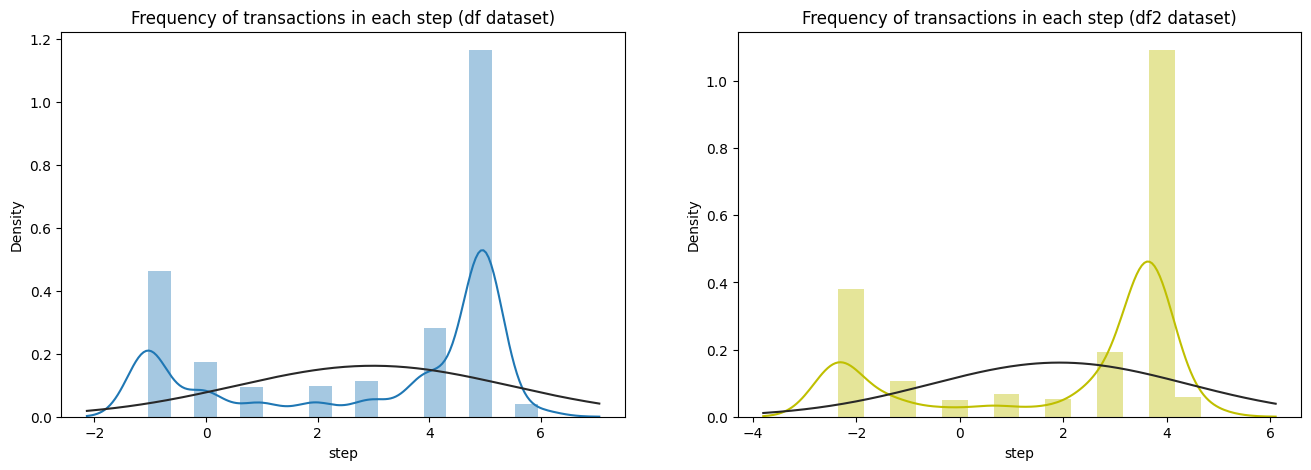

In [ ]:
plt.rcParams['figure.figsize'] =(16, 5)

plt.subplot(1, 2, 1)
sns.distplot(df.step, fit=norm)
plt.title('Frequency of transactions in each step (df dataset)', fontsize = 12)

plt.subplot(1, 2, 2)
sns.distplot(df2.step, fit=norm, color='y')
plt.title('Frequency of transactions in each step (df2 dataset)', fontsize = 12)

plt.show()

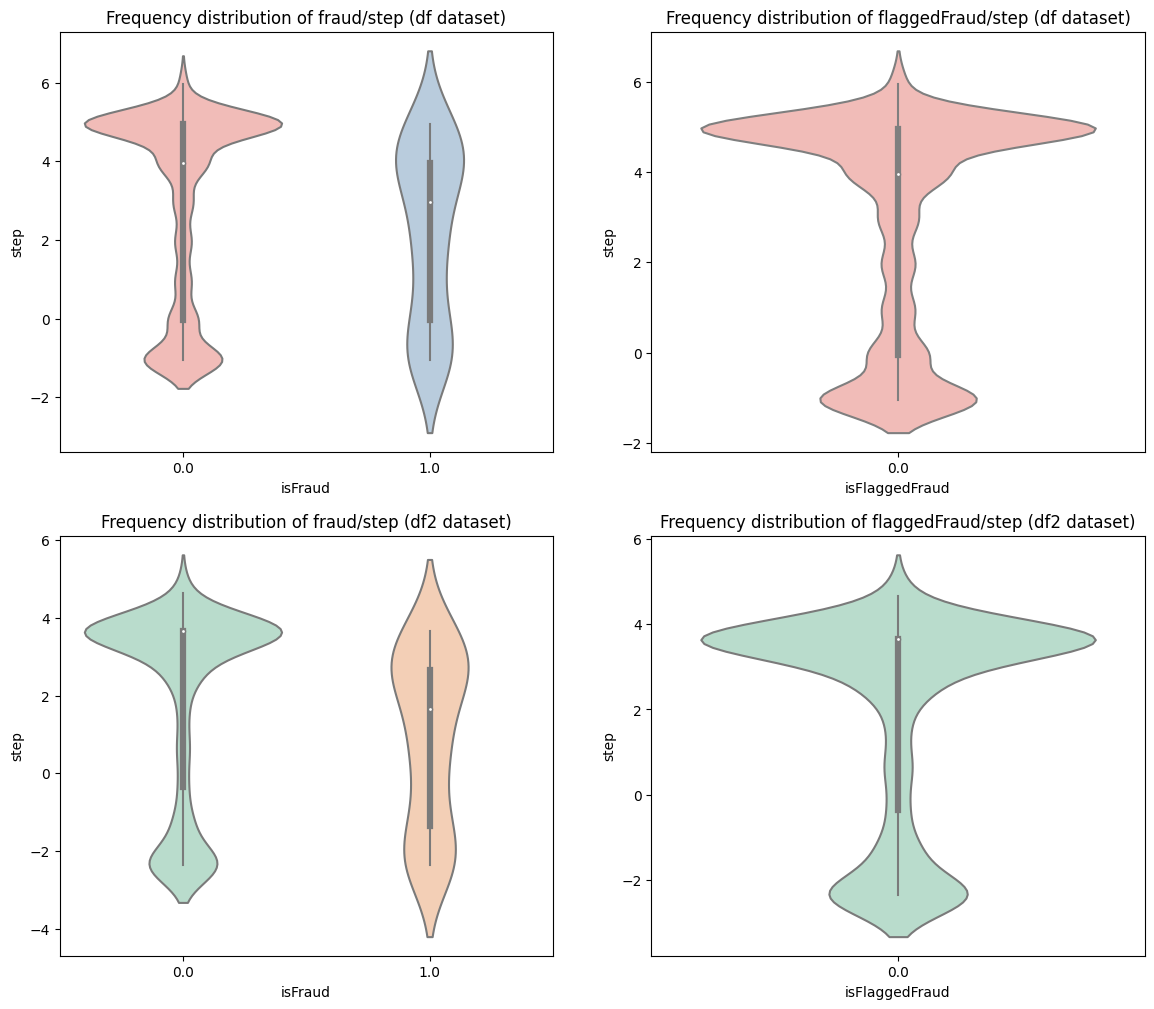

In [ ]:

plt.rcParams['figure.figsize'] =(14, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x='isFraud',y='step',data=df, palette='Pastel1')
plt.title('Frequency distribution of fraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x='isFlaggedFraud',y='step',data=df, palette='Pastel1')
plt.title('Frequency distribution of flaggedFraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x='isFraud',y='step',data=df2, palette='Pastel2')
plt.title('Frequency distribution of fraud/step (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x='isFlaggedFraud',y='step',data=df2, palette='Pastel2')
plt.title('Frequency distribution of flaggedFraud/step (df2 dataset)', fontsize = 12)

plt.show()

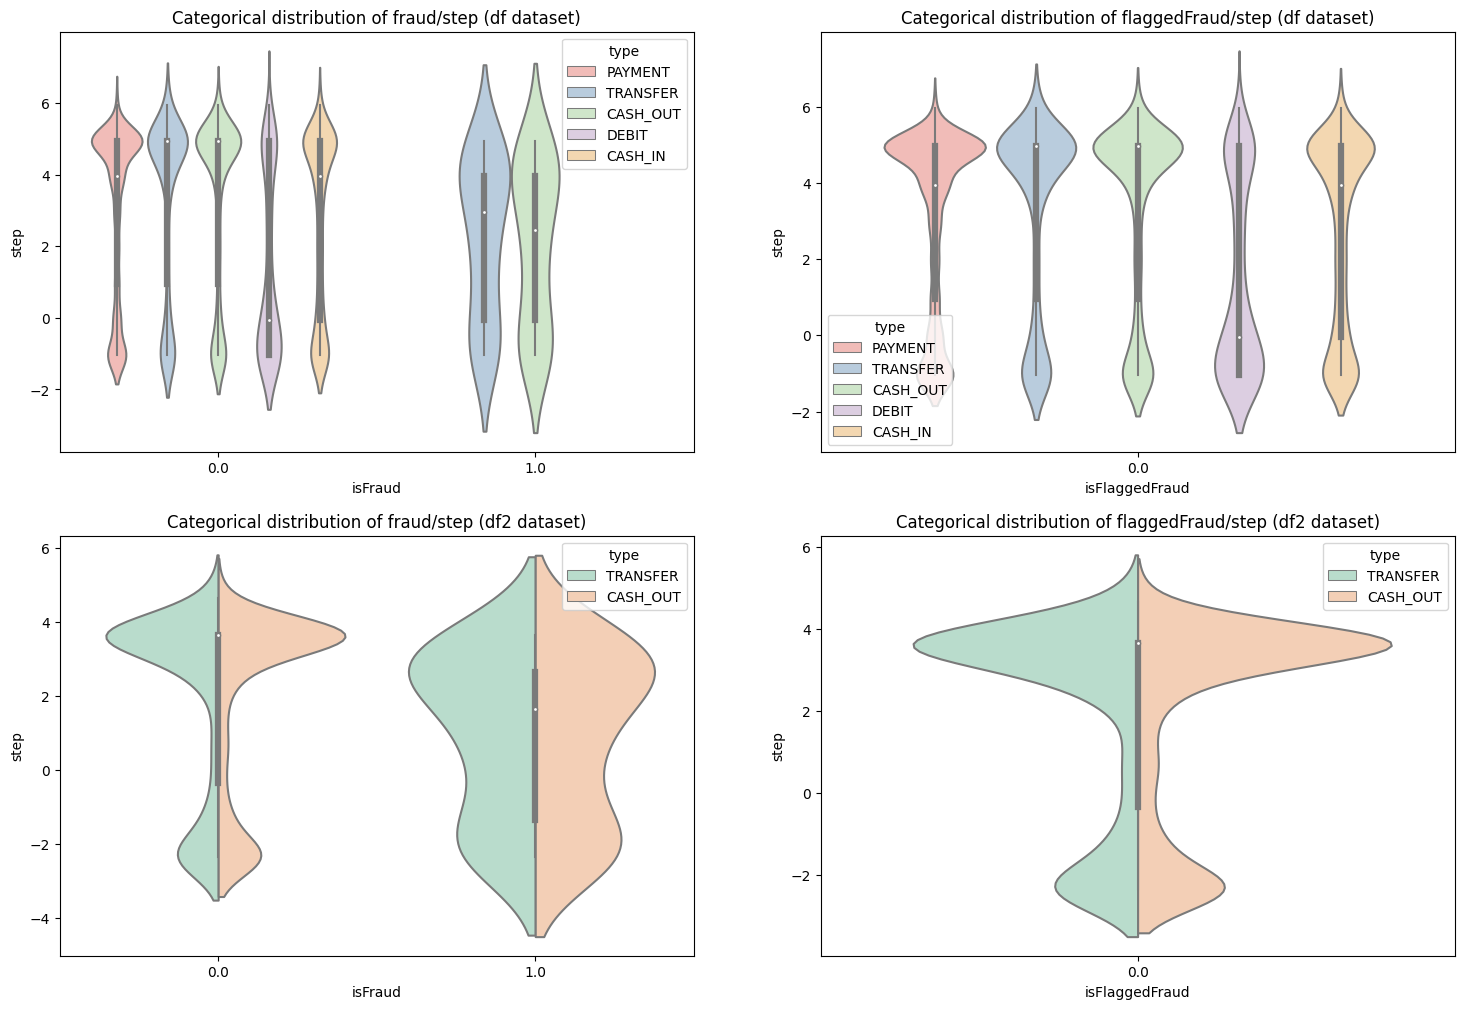

In [ ]:
plt.rcParams['figure.figsize'] =(18, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x='isFraud',y='step',data=df, hue='type', palette='Pastel1')
plt.title('Categorical distribution of fraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x='isFlaggedFraud',y='step',data=df, hue='type', palette='Pastel1')
plt.title('Categorical distribution of flaggedFraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x='isFraud',y='step',data=df2, hue='type', split=True, palette='Pastel2')
plt.title('Categorical distribution of fraud/step (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x='isFlaggedFraud',y='step',data=df2, hue='type', split=True, palette='Pastel2')
plt.title('Categorical distribution of flaggedFraud/step (df2 dataset)')

plt.show()

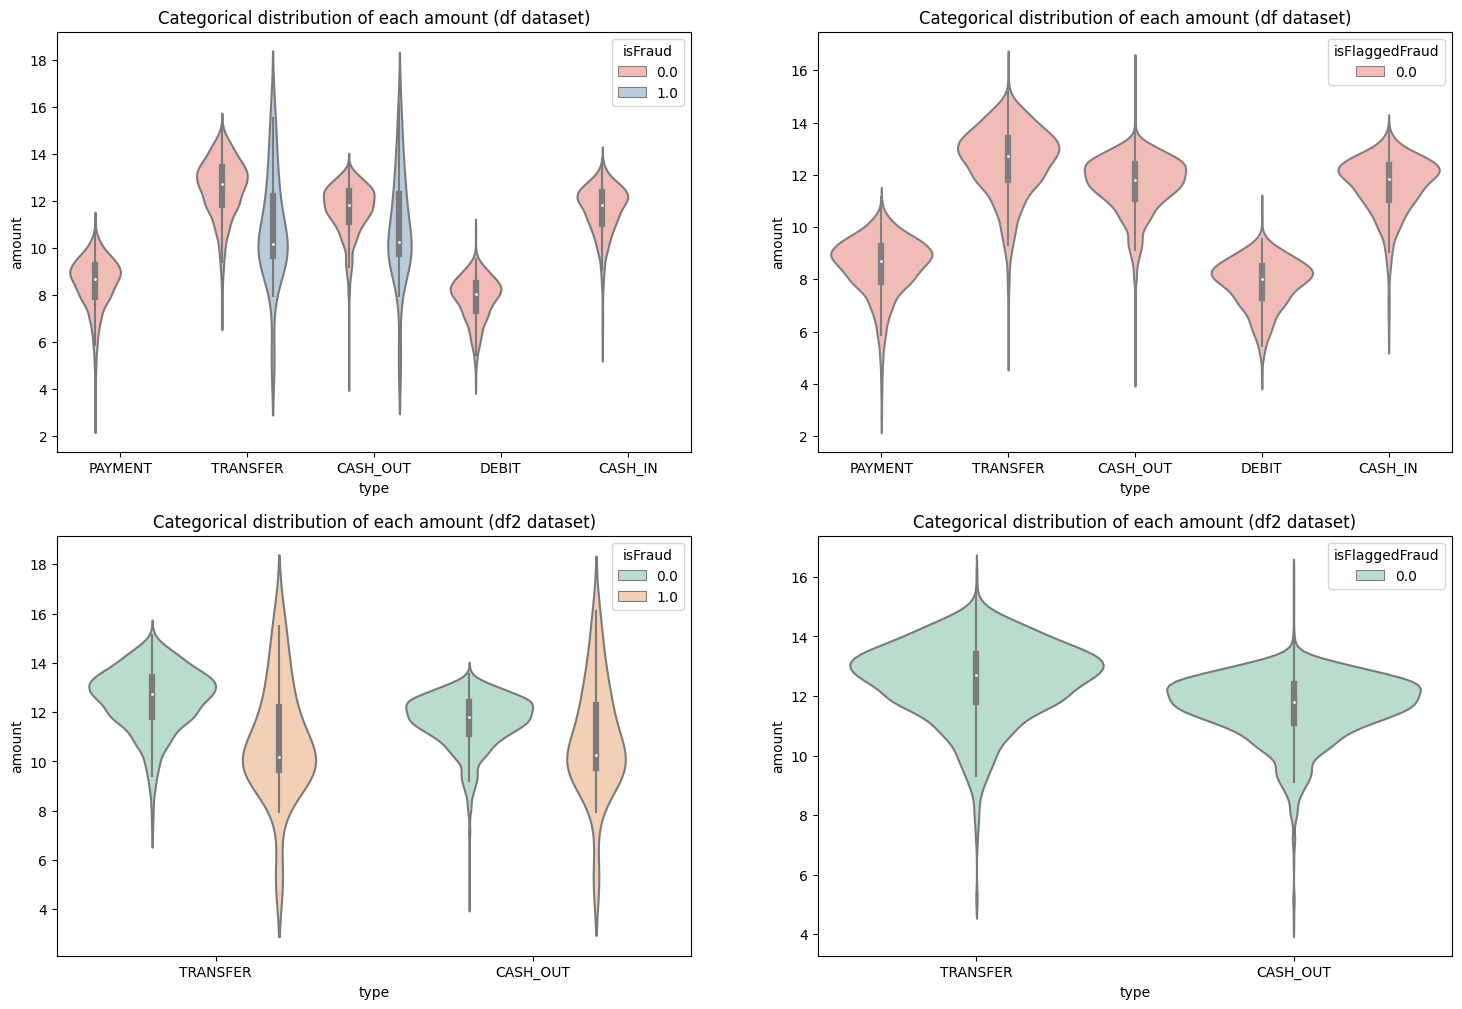

In [ ]:
plt.rcParams['figure.figsize'] = (18, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x = 'type', y = 'amount', data=df, hue='isFraud', palette='Pastel1')
plt.title('Categorical distribution of each amount (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x = 'type', y = 'amount', data=df, hue='isFlaggedFraud', palette='Pastel1')
plt.title('Categorical distribution of each amount (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x = 'type', y = 'amount', data=df2, hue='isFraud', palette='Pastel2')
plt.title('Categorical distribution of each amount (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x = 'type', y = 'amount', data=df2, hue='isFlaggedFraud', palette='Pastel2')
plt.title('Categorical distribution of each amount (df2 dataset)', fontsize = 12)

plt.show()

**FEATURE ENGINEERING**

In [ ]:
df['diffOrg']  = df['oldbalanceOrg']  - df['newbalanceOrig'] + df['amount']
df['diffDest'] = df['oldbalanceDest'] - df['newbalanceDest'] + df['amount']

df2['diffOrg']  = df2['oldbalanceOrg']  - df2['newbalanceOrig'] + df2['amount']
df2['diffDest'] = df2['oldbalanceDest'] - df2['newbalanceDest'] + df2['amount']

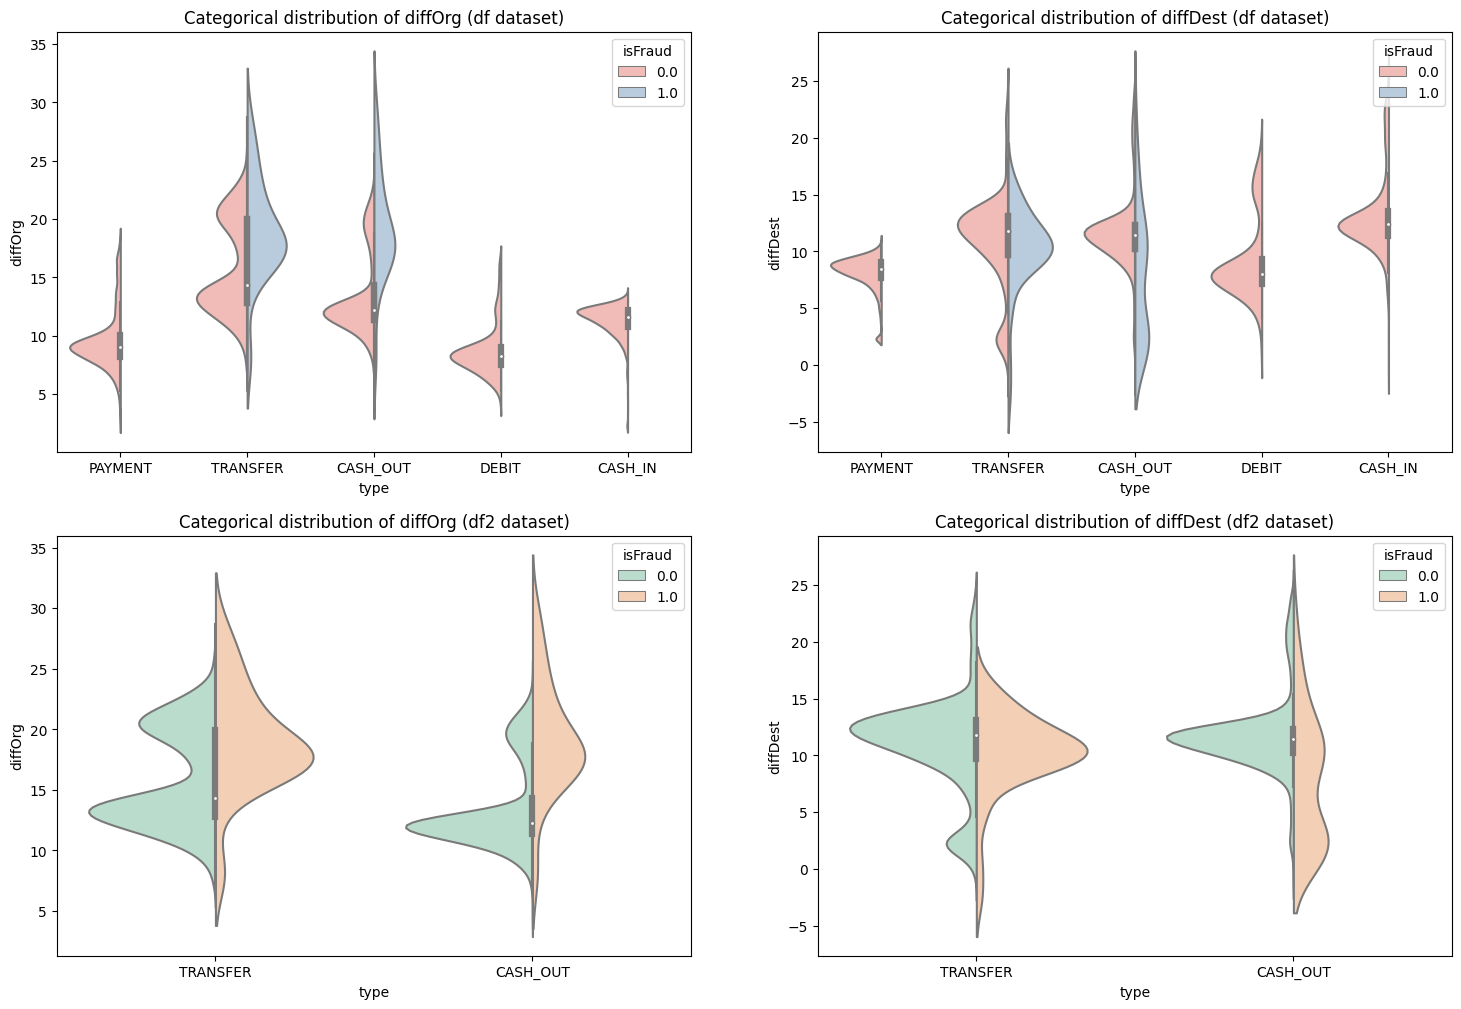

In [ ]:
plt.rcParams['figure.figsize'] = (18, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x = 'type', y = 'diffOrg', data=df, hue='isFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of diffOrg (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x = 'type', y = 'diffDest', data=df, hue='isFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of diffDest (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x = 'type', y = 'diffOrg', data=df2, hue='isFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of diffOrg (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x = 'type', y = 'diffDest', data=df2, hue='isFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of diffDest (df2 dataset)', fontsize = 12)

plt.show()


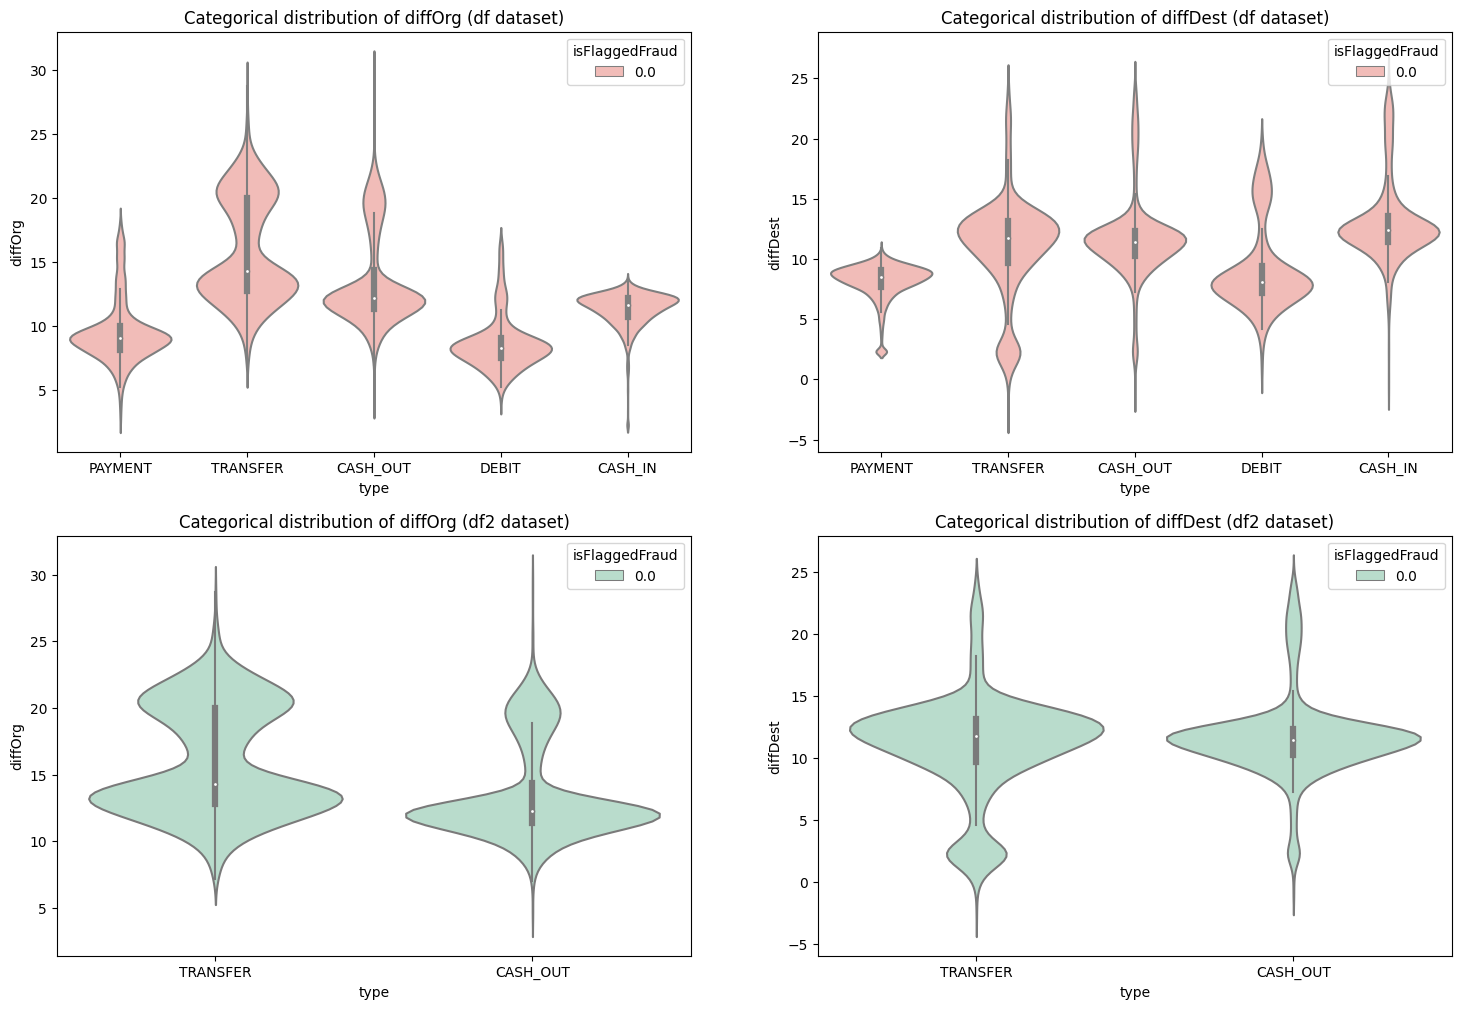

In [ ]:
plt.rcParams['figure.figsize'] = (18, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x = 'type', y = 'diffOrg', data=df, hue='isFlaggedFraud', palette='Pastel1')
plt.title('Categorical distribution of diffOrg (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x = 'type', y = 'diffDest', data=df, hue='isFlaggedFraud', palette='Pastel1')
plt.title('Categorical distribution of diffDest (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x = 'type', y = 'diffOrg', data=df2, hue='isFlaggedFraud', palette='Pastel2')
plt.title('Categorical distribution of diffOrg (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x = 'type', y = 'diffDest', data=df2, hue='isFlaggedFraud', palette='Pastel2')
plt.title('Categorical distribution of diffDest (df2 dataset)', fontsize = 12)

plt.show()


**SMOTE oversampling for imbalanced data**

In [ ]:
print(f'Fraud ratio \n{fraud_ratio} \n\nFlagged fraud ratio \n{flaggedFraud_ratio}')

Fraud ratio 
0.0    0.994525
1.0    0.005475
Name: isFraud, dtype: float64 

Flagged fraud ratio 
0.0    1.0
Name: isFlaggedFraud, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X = df
Y = df['isFraud']          # target label
X = pd.concat([X, pd.get_dummies(X['type'])], axis = 'columns')       # one-hot columns for transaction type
X = X.drop(['isFraud', 'type'], axis=1)

X2 = df2
Y2 = df2['isFraud']
X2 = pd.concat([X2, pd.get_dummies(X2['type'])], axis = 'columns')
X2 = X2.drop(['isFraud', 'type'], axis=1)

In [ ]:
len(X), len(X2)

(14246, 3492)

In [ ]:
X, Y = SMOTE().fit_resample(X, Y)
X2, Y2 = SMOTE().fit_resample(X2, Y2)

In [ ]:
len(X), len(X2)

(28336, 6828)

In [ ]:
list(Y).count(1), list(Y2).count(1)

(14168, 3414)

In [ ]:
list(Y).count(0), list(Y2).count(0)

(14168, 3414)

**TRAINING**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
random_state = 55

In [ ]:
p = np.random.RandomState(seed=random_state).permutation(len(X))
p2 = np.random.RandomState(seed=random_state).permutation(len(X2))

In [ ]:
X, Y = X.iloc[p], Y.iloc[p]
X2, Y2 = X2.iloc[p2], Y2.iloc[p2]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = random_state)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = random_state)

x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = random_state)
x2_val, x2_test, y2_val, y2_test = train_test_split(x2_test, y2_test, test_size = 0.5, random_state = random_state)

In [ ]:
import gc

In [ ]:
del df, df2, df_missing, df_outliers, dff_outliers, X, Y, X2, Y2, cols

In [ ]:
gc.collect()

71452

**Training the classifier**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(tree_method = "gpu_hist", random_state=random_state)
model2 = XGBClassifier(tree_method = "gpu_hist", random_state=random_state)

In [ ]:
model.fit(x_train, y_train)
model2.fit(x2_train, y2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=55, ...)

In [ ]:
gc.collect()

3465

**EVALUATION**

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, f1_score

def evaluate(trainedmodel, x, y):
  '''
    To evaluate model performance
  '''
  y_pred   = trainedmodel.predict(x)
  f1       = f1_score(y, y_pred)
  report   = classification_report(y, y_pred)
  acc      = accuracy_score(y, y_pred)
  roc_auc  = roc_auc_score(y, y_pred)

  eval = {'y_pred': y_pred,
          'f1_score': f1,
          'accuracy':acc,
          'roc_auc_score': roc_auc
          }

  return eval, report

In [ ]:
eval_train, report_train = evaluate(model, x_train, y_train)
eval_val, report_val = evaluate(model, x_val, y_val)

eval2_train, report2_train = evaluate(model2, x2_train, y2_train)
eval2_val, report2_val = evaluate(model2, x2_val, y2_val)

In [ ]:
import pprint
pprint._sorted = lambda x:x

In [ ]:
print('Evaluation metrics on training data (for df): \n')
pprint.pprint(eval_train)
print('\n',report_train)

print('\n\nEvaluation metrics on val data (for df): \n')
pprint.pprint(eval_val)
print('\n', report_val)

Evaluation metrics on training data (for df): 

{'accuracy': 1.0,
 'f1_score': 1.0,
 'roc_auc_score': 1.0,
 'y_pred': array([1, 1, 1, ..., 0, 1, 0])}

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11324
         1.0       1.00      1.00      1.00     11344

    accuracy                           1.00     22668
   macro avg       1.00      1.00      1.00     22668
weighted avg       1.00      1.00      1.00     22668



Evaluation metrics on val data (for df): 

{'accuracy': 0.9985885673959068,
 'f1_score': 0.9985785358919688,
 'roc_auc_score': 0.9986004198740378,
 'y_pred': array([0, 1, 1, ..., 1, 0, 0])}

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1429
         1.0       1.00      1.00      1.00      1405

    accuracy                           1.00      2834
   macro avg       1.00      1.00      1.00      2834
weighted avg       1.00      1.00      1.00      2834



In [ ]:
print('Evaluation metrics on training data (for df2): \n')
pprint.pprint(eval2_train)
print('\n', report2_train)

print('\n\nEvaluation metrics on val data (for df2): \n')
pprint.pprint(eval2_val)
print('\n', report2_val)

Evaluation metrics on training data (for df2): 

{'accuracy': 1.0,
 'f1_score': 1.0,
 'roc_auc_score': 1.0,
 'y_pred': array([1, 1, 0, ..., 1, 1, 1])}

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2718
         1.0       1.00      1.00      1.00      2744

    accuracy                           1.00      5462
   macro avg       1.00      1.00      1.00      5462
weighted avg       1.00      1.00      1.00      5462



Evaluation metrics on val data (for df2): 

{'accuracy': 0.9985358711566618,
 'f1_score': 0.9984871406959154,
 'roc_auc_score': 0.9984894259818731,
 'y_pred': array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 

In [ ]:
gc.collect()

0

In [ ]:
eval_test, report_test = evaluate(model, x_test, y_test)
eval2_test, report2_test = evaluate(model2, x2_test, y2_test)

In [ ]:
print('Evaluation metrics on test data (for df): \n')
pprint.pprint(eval_test)
print('\n', report_test)

print('\n\nEvaluation metrics on test data (for df2): \n')
pprint.pprint(eval2_test)
print('\n', report2_test)

Evaluation metrics on test data (for df): 

{'accuracy': 0.9992942836979535,
 'f1_score': 0.9992957746478874,
 'roc_auc_score': 0.9992932862190812,
 'y_pred': array([0, 1, 1, ..., 0, 0, 0])}

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1415
         1.0       1.00      1.00      1.00      1419

    accuracy                           1.00      2834
   macro avg       1.00      1.00      1.00      2834
weighted avg       1.00      1.00      1.00      2834



Evaluation metrics on test data (for df2): 

{'accuracy': 0.9985358711566618,
 'f1_score': 0.9985272459499264,
 'roc_auc_score': 0.998546511627907,
 'y_pred': array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1,

In [ ]:
best = model

In [ ]:
from xgboost import plot_importance

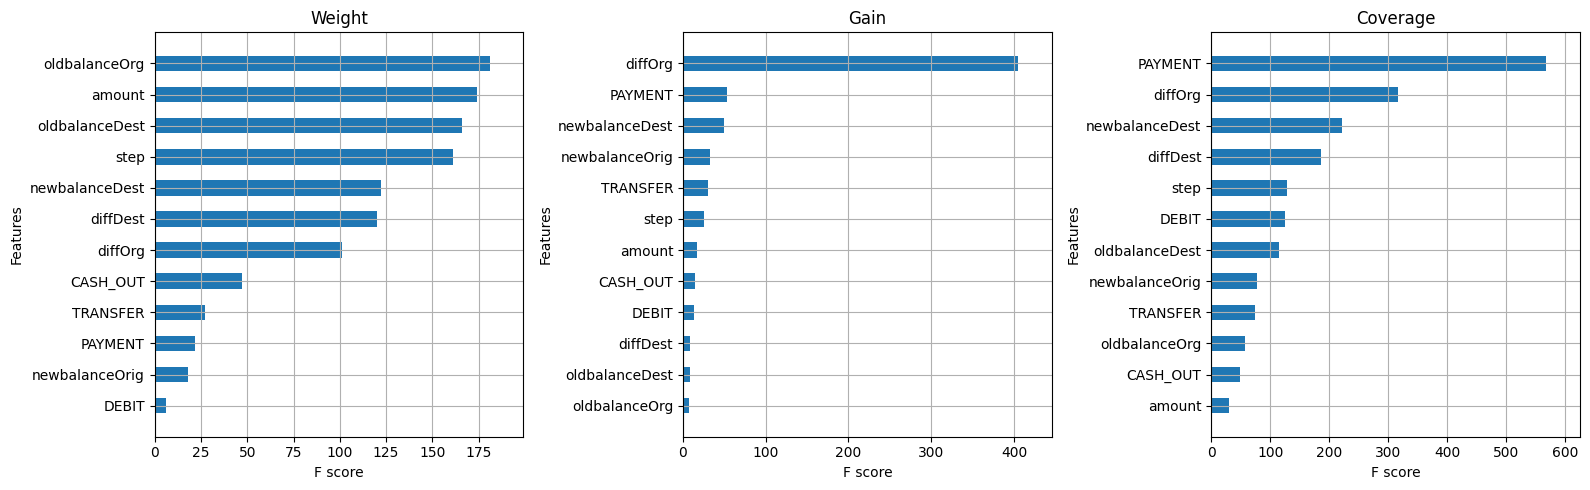

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

plot_importance(booster=best, importance_type='weight', title='Weight', show_values=False, height=0.5, ax = ax[0])

# plot importances with split mean gain
plot_importance(booster=best, importance_type='gain', title='Gain', show_values=False, height=0.5, ax = ax[1])

# plot importances with sample coverage
plot_importance( booster=best, importance_type='cover', title='Coverage', show_values=False, height=0.5, ax = ax[2])

plt.tight_layout()
plt.show()

# **Describe your fraud detection model in elaboration.**

dataset:Fraud.csv

---



ans: The fraud detection project involves building a machine learning model to identify and prevent fraudulent activities.
Different algorithms are evaluated, and the chosen model is trained on labeled data to learn patterns associated with fraud. The model is then evaluated on a separate dataset to measure its performance. Once deployed, it continuously monitors real-time data, scores transactions for fraud likelihood, and raises alerts when suspicious activity is detected. The model undergoes regular monitoring and refinement to ensure its effectiveness in detecting evolving fraud patterns.

1.Data preprocessing

2.Model selection and training

3.Model evaluation

4.Fine-tuning hyperparameters, feature selection

# **How did you select variables to be included in the model?**

---



ans: Feature Importances = Algorithms such as decision trees, random forests, and gradient boosting models can be used to determine the relative importance of features.


# **Demonstrate the performance of the model by using best set of tools**

---



ans: Train: 80%, validation:10%, test:10%

we have got 99% accuracy and f1-score during test

# **What are the key factors that predict fraudulent customer?**

---



ans: 1.Detecting transactions or account activities from unexpected or high-risk locations

2.nusually large amounts, frequent transactions within a short time period, or transactions that deviate significantly from a customer's normal behavior

3.multiple devices or IP addresses associated with a single account

4.personal information can also provide insights into potential fraud

# **Do these factors make sense? If yes, How? If not, How not?**

---
ans: Yes, these factors make sense in the context of fraud detection
 By flagging transactions from high-risk or unexpected locations, we can better identify potential fraud. Monitoring changes in account behavior is crucial because sudden spikes in transaction frequency, changes in spending patterns, or other unusual account activities may suggest fraudulent behavior.


# **What kind of prevention should be adopted while company update its infrastructure?**

---
ans: 1.Conduct a thorough risk assessment

2.Regular backups and disaster recovery

3.Employee awareness and training


# **Assuming these actions have been implemented, how would you determine if they work?**

---
ans: 1.User feedback

2.Penetration testing

3.System performance and availability
